# 概念

## 正式性定义

梯度下降法（gradient descent），又名最速下降法（steepest descent）是求解无约束最优化问题最常用的方法，它是一种迭代方法，每一步主要的操作是求解目标函数的梯度向量，将当前位置的负梯度方向作为搜索方向（因为在该方向上目标函数下降最快，这也是最速下降法名称的由来）。

梯度下降法特点：越接近目标值，步长越小，下降速度越慢。

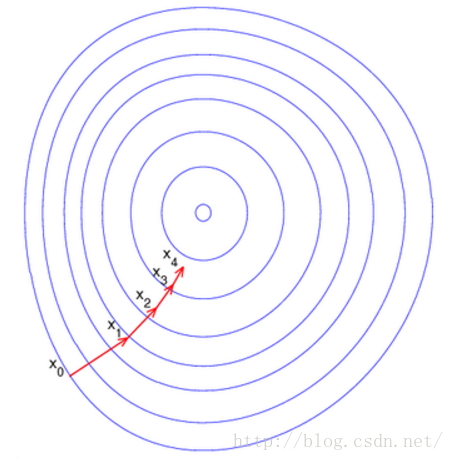

这里每一个圈代表一个函数梯度，最中心表示函数极值点，每次迭代根据当前位置求得的梯度（用于确定搜索方向以及与步长共同决定前进速度）和步长找到一个新的位置，这样不断迭代最终到达目标函数局部最优点（如果目标函数是凸函数，则到达全局最优点）。

## 形象性定义

所谓的梯度下降:
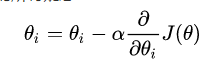

说明:上面的公式就是一个位置更新公式,说白了，就是你每走一步，就记录下你现在的位置，也就是等号左边的θi,那么走一步走多远呐？答案应该是α，那你要朝哪个方向走呢？答案是J(θ)关于θi的偏导数

既有前进的方向，又有前进的距离，很容易联想到学过的向量。这些向量首尾相连，这个轨迹就是这个方程的曲线图。画在图上大概是这个样子：

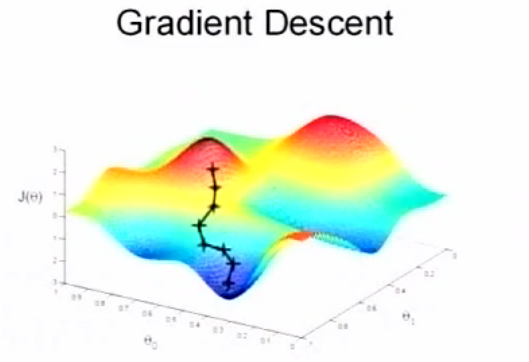

# 公式推导

## 一般推导

一个通俗化的式子(风险函数):


**释义:**
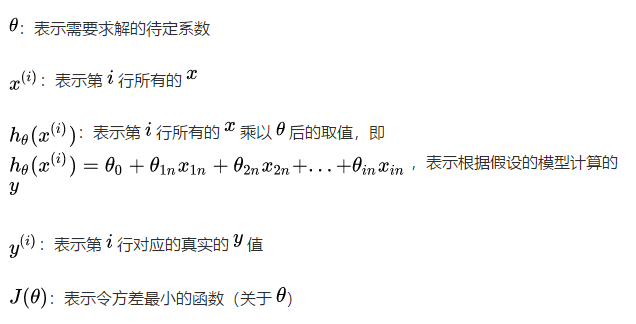

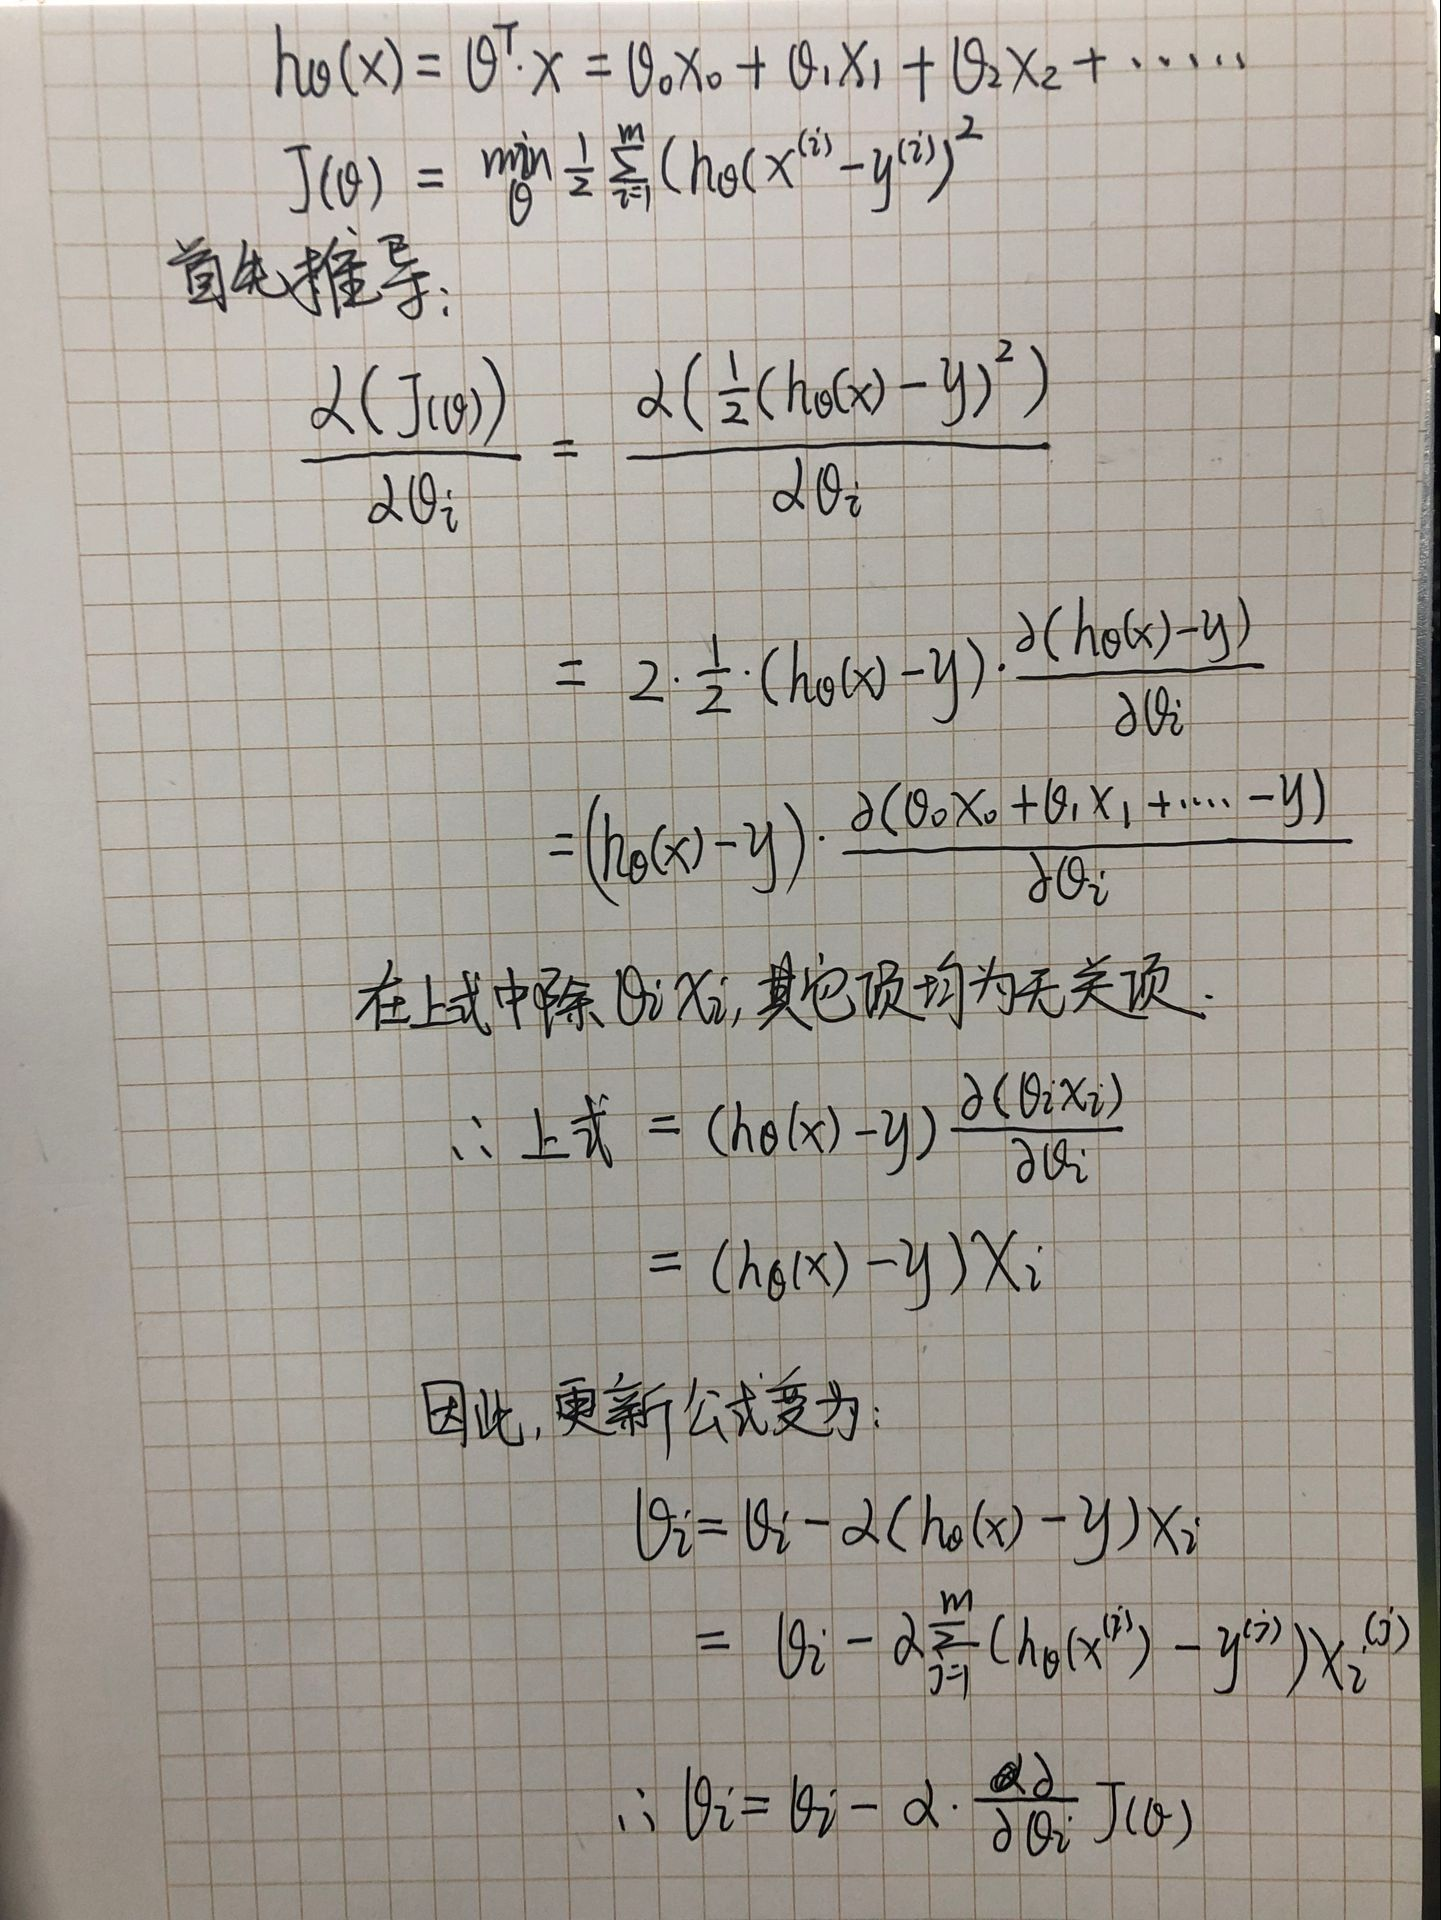

## 矩阵求解法

推导公式用到的:
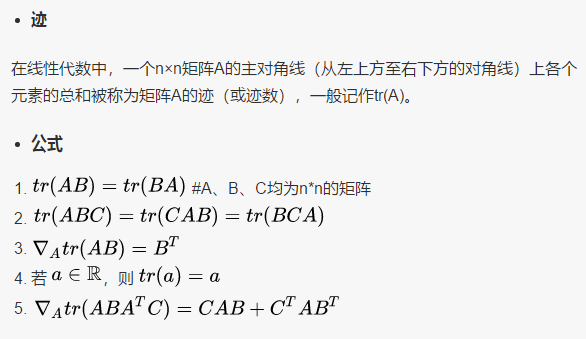

推导:
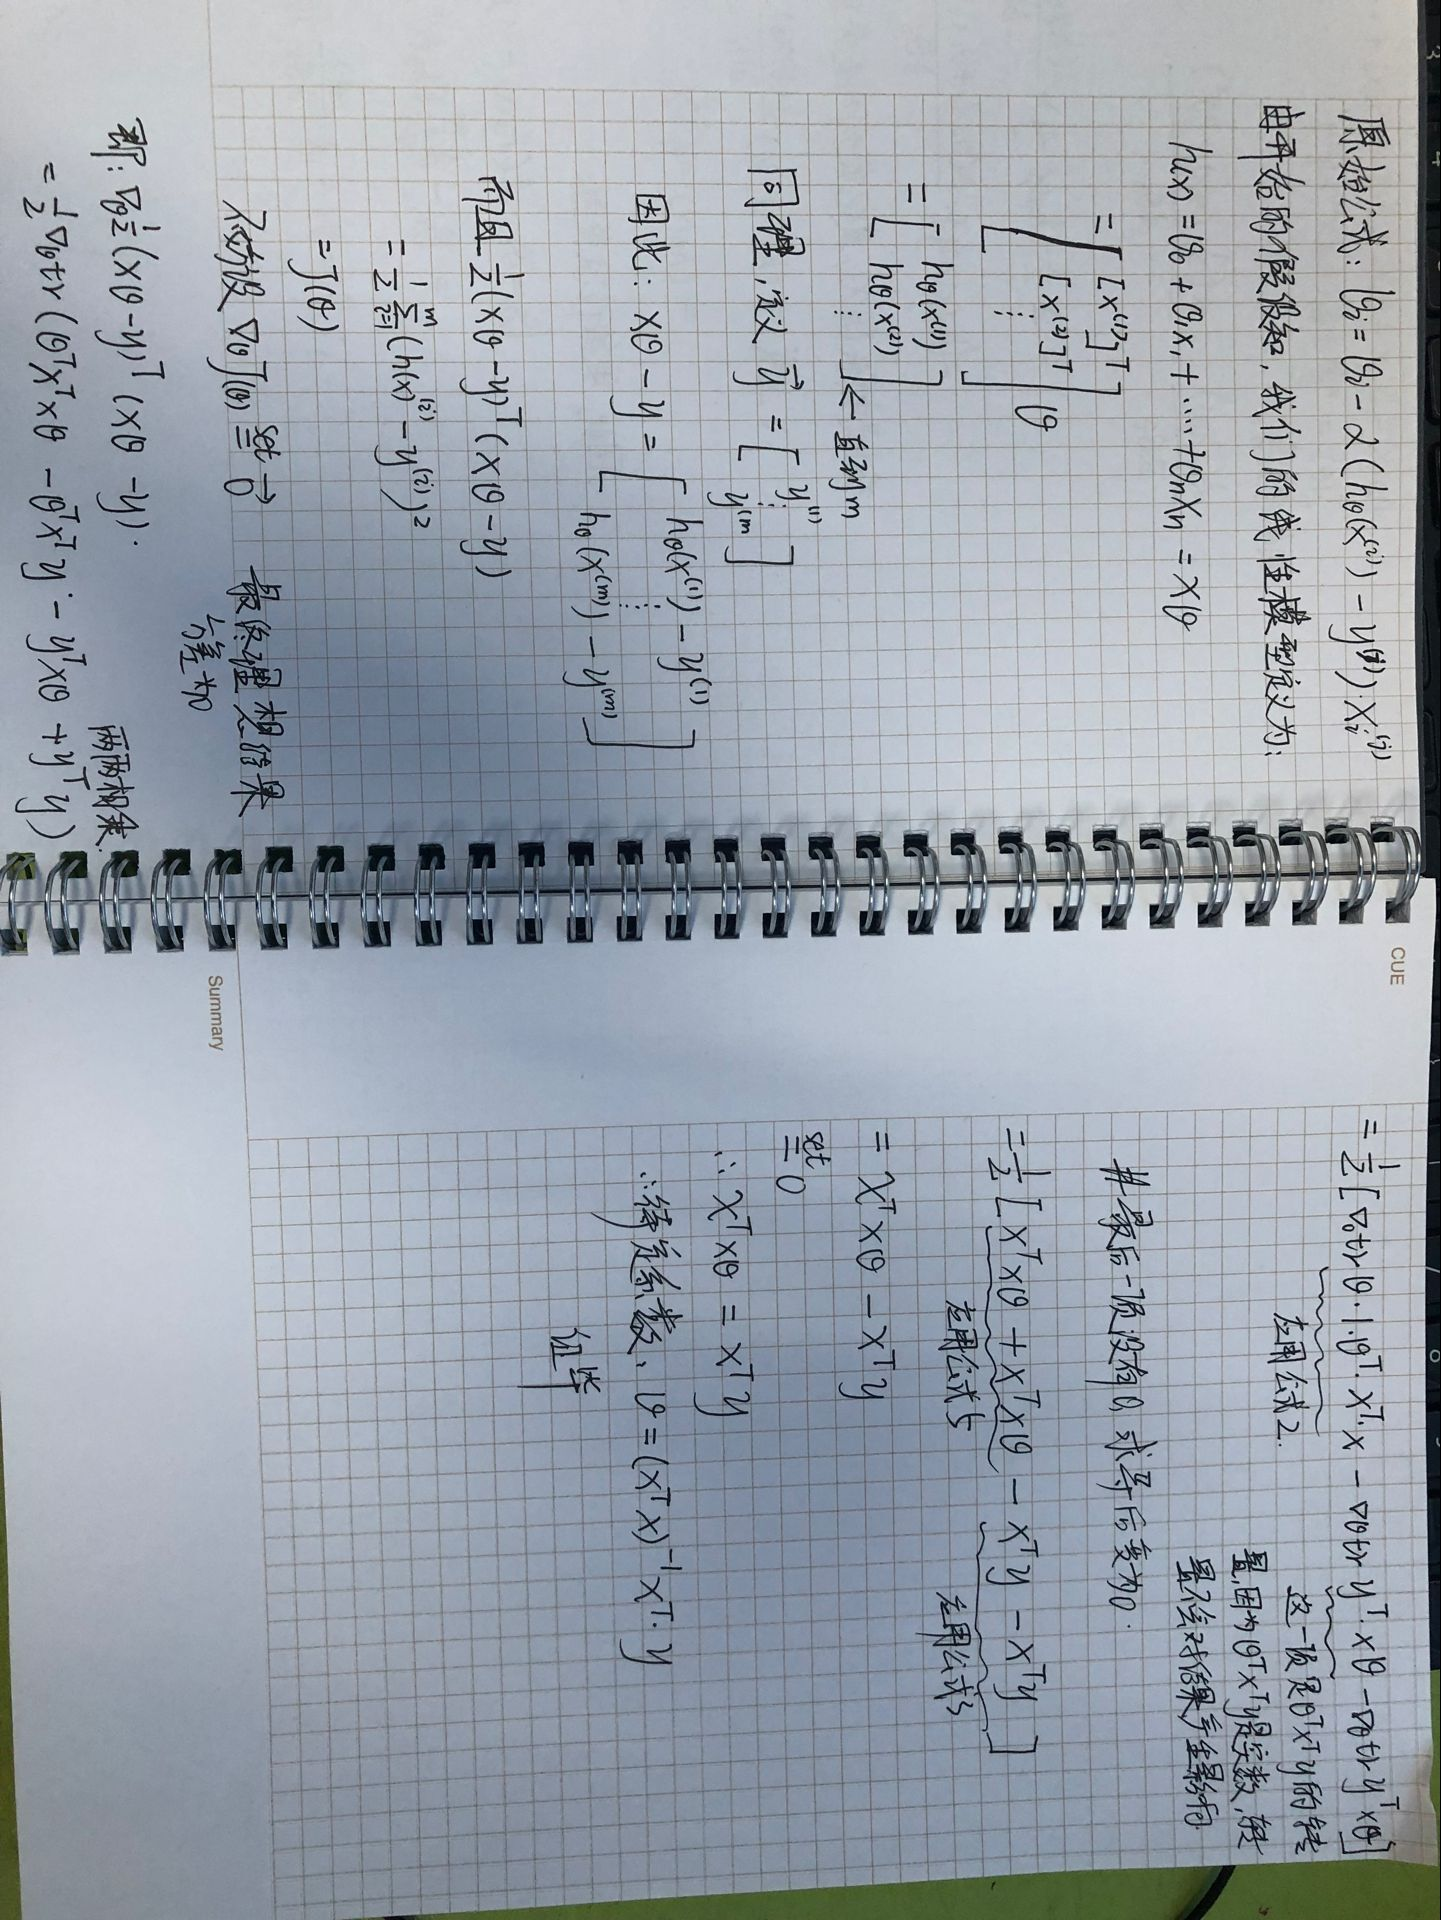

# 批量梯度下降(BGD)

当"公式推导"过程中的样本的数量不为1时,即:
    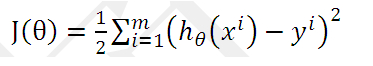

通过批量梯度下降(BGD)可以得到:
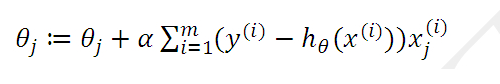

从上面公式可以注意到，它得到的是一个全局最优解，但是每迭代一步，都要用到训练集所有的数据

**优点：**

  （1）一次迭代是对所有样本进行计算，此时利用矩阵进行操作，实现了并行。
  
  （2）由全数据集确定的方向能够更好地代表样本总体，从而更准确地朝向极值所在的方向。当目标函数为凸函数时，BGD一定能够得到全局最优。
  
**缺点：**

  （1）当样本数目 m 很大时，每迭代一步都需要对所有样本计算，训练过程会很慢。

# 随机梯度下降(SGD)

当样本集数据量m很大时，批量梯度下降算法每迭代一次的复杂度为O(mn),复杂度很高。因此，为了减少复杂度，当m很大时，我们更多时候使用随机梯度下降算法(stochastic gradient descent)。

伪代码解释:
    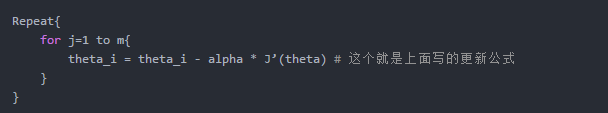
    这里随机选择的数据是m行

即每读取一条样本，就迭代对ΘT进行更新，然后判断其是否收敛，若没收敛，则继续读取样本进行处理，如果所有样本都读取完毕了，则循环重新从头开始读取样本进行处理。

这样迭代一次的算法复杂度为O(n)。对于大数据集，很有可能只需读取一小部分数据，函数J(Θ)就收敛了。比如样本集数据量为100万，有可能读取几千条或几万条时，函数就达到了收敛值。所以当数据量很大时，更倾向于选择随机梯度下降算法。

但是，相较于批量梯度下降算法而言，随机梯度下降算法使得J(Θ)趋近于最小值的速度更快，但是有可能造成永远不可能收敛于最小值，有可能一直会在最小值周围震荡，但是实践中，大部分值都能够接近于最小值，效果也都还不错。

**优点：**

  （1）由于不是在全部训练数据上的损失函数，而是在每轮迭代中，随机优化某一条训练数据上的损失函数，这样每一轮参数的更新速度大大加快。
  
**缺点：**

  （1）准确度下降。由于即使在目标函数为强凸函数的情况下，SGD仍旧无法做到线性收敛。
  
  （2）可能会收敛到局部最优，由于单个样本并不能代表全体样本的趋势。
  
  （3）不易于并行实现。

# 小批量梯度下降(MBGD)

小批量梯度下降法(Mini-Batch Gradient Descent, MBGD)是结合了SGD和BGD的一种改进版本，既有训练速度快，也有精度较高的特点，其基本特点就是每一次训练迭代在训练集中随机采样batch_size个样本，其表达式为： 
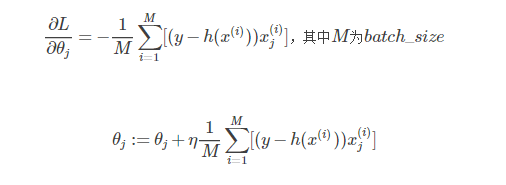

**优点：**

  （1）通过矩阵运算，每次在一个batch上优化神经网络参数并不会比单个数据慢太多。
  
  （2）每次使用一个batch可以大大减小收敛所需要的迭代次数，同时可以使收敛到的结果更加接近梯度下降的效果。(比如上例中的30W，设置          batch_size=100时，需要迭代3000次，远小于SGD的30W次)
  
  （3）可实现并行化。
  
**缺点：**

  （1）batch_size的不当选择可能会带来一些问题。

# 代码实现

**一个小案例:**假如我们得到了样本(1,1),(2,2),（3，3）.由这三个样本我们可以得到函数y=1*x.此时损失函数为0.但机器并不知道,我们可以进行训练

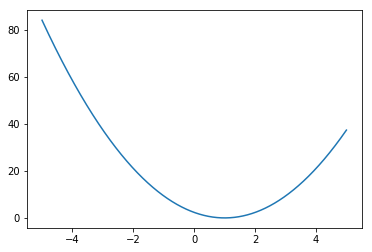

In [9]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(-5,5,0.001)
y = (((x-1)*(x-1)+(x*2-2)*(x*2-2)+(x*3-3)*(x*3-3))*1/6.0)
plt.plot(x,y)
plt.show()

上是损失函数的图像，损失函数中变量是k。下图横坐标为k的不同取值，纵轴为对应的损失大小。由下图可以大致看出，当k为1时，损失函数值为0。注意：这里取的最优值k=1是在我们已有样本的情况下得出的,样本不同，k值自然不同。

In [10]:
def sum(x):
    return ((x*1-1)*1+(x*2-2)*2+(x*3-3)*3)
def fun(x):
    return ((1/3.0)*sum(x))
old = 0
new = 5
step = 0.01
pre = 0.00000001
def src_fun(x):
    print(((x-1)*(x-1)+(x*2-2)*(x*2-2)+(x*3-3)*(x*3-3))*1/6.0)
while abs(new-old)>pre:
  old = new
  #src_fun(old)   #输出每次迭代的损失值
  new = new - step*fun(old)


print(new)
print(src_fun(new))

1.0000001977980435
9.128948731816311e-14
None
